This notebook explores the aspect of heterogeneous observer capabilities in OND. The idea is to show how varying observational capabilities, represented by a factor \( O_i \), can influence both individual node and collective network behavior.

Here's what the visualizations show:

1. **Network Node States Over Time**: A heatmap that shows how the state of each node changes over time.

2. **Observer Node States Over Time**: A heatmap that indicates how observer states evolve, influenced by their individual observational factors \( O_i \).

3. **Distribution of Observational Factors**: A histogram to show the distribution of \( O_i \) across all nodes, providing insight into the heterogeneity of observer capabilities.

The notebook also calculates the average network observability, which is an aggregate measure given by \( \langle O_i \rangle \).

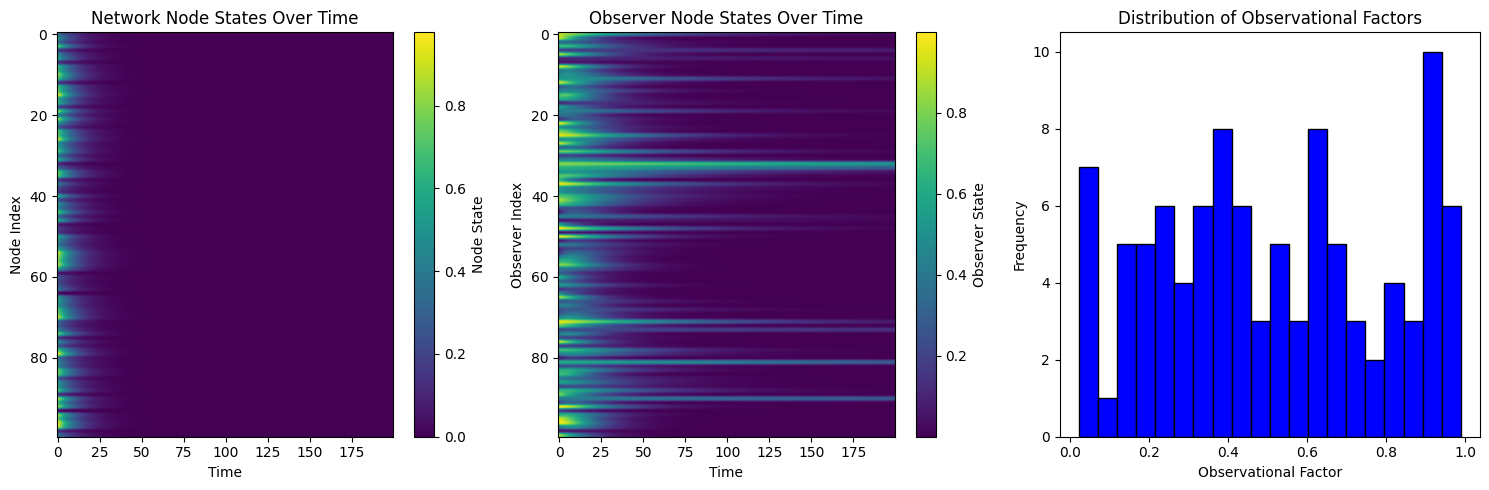

0.5131571006063613

In [1]:
# Importing necessary libraries for simulation and visualization
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of nodes
T = 200  # Time steps
dt = 0.1  # Time step size

# Observational factor for each node
O = np.random.rand(N)

# Initialization
x = np.random.rand(N, T)  # States for all nodes
y = np.random.rand(N, T)  # States for observer nodes (for simplicity, each node is also an observer)

# Function to update node states considering heterogeneous observer capabilities
def update_states(x, y, O, t, dt):
    for i in range(N):
        dx = dt * (-x[i, t-1])  # For simplicity, dx/dt = -x (exponential decay)
        dy = dt * O[i] * (x[i, t-1] - y[i, t-1])  # Observer state being pulled towards the node state
        x[i, t] = x[i, t-1] + dx
        y[i, t] = y[i, t-1] + dy

# Simulation loop
for t in range(1, T):
    update_states(x, y, O, t, dt)

# Calculate average network observability
avg_observability = np.mean(O)

# Visualization
plt.figure(figsize=(15, 5))

# Plot showing the current state of each node
plt.subplot(1, 3, 1)
plt.imshow(x, aspect='auto', cmap='viridis')
plt.title("Network Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Node Index")
plt.colorbar(label="Node State")

# Plot showing the current state of each observer node
plt.subplot(1, 3, 2)
plt.imshow(y, aspect='auto', cmap='viridis')
plt.title("Observer Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Observer Index")
plt.colorbar(label="Observer State")

# Histogram of observational factors O_i
plt.subplot(1, 3, 3)
plt.hist(O, bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Observational Factors")
plt.xlabel("Observational Factor")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

avg_observability
